In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sleep Dataset

In [44]:
# Load dataset
s_df = pd.read_csv('../data/garmin/sleep.csv', sep=',')

# Trim columns
s_df = s_df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source', 'Sleep Efficiency', 'Sleep Score Value']]

# Convert data types
s_df['Calendar Date (Local)'] = pd.to_datetime(s_df['Calendar Date (Local)'])

# Add column with calculated sleep hours
s_df['Duration (h)'] = s_df['Duration (s)'] / 60 / 60
s_df['Deep Sleep Duration (h)'] = s_df['Deep Sleep Duration (s)'] / 60 / 60
s_df['Light Sleep Duration (h)'] = s_df['Light Sleep Duration (s)'] / 60 / 60
s_df['Rem Sleep Duration (h)'] = s_df['Rem Sleep Duration (s)'] / 60 / 60

s_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
1,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
2,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
3,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
4,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3792,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3793,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3794,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000


## Comparison between individuals

In [3]:
df_users = s_df.drop_duplicates(subset=['Calendar Date (Local)', 'User First Name'])

# Filter for device source
df_users = df_users[df_users['Source'] == 'device']

print(df_users['User First Name'].unique())

df_users

['P10' 'P11' 'P12' 'P14']


,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.600000,2.333333
196,P10,2023-12-24,2023-12-24T01:13:00,2023-12-24T08:56:00,27780,6000,5580,15060,device,0.958963,81.0,7.716667,1.550000,4.183333,1.666667
276,P10,2023-12-25,2023-12-25T01:07:00,2023-12-25T09:41:00,30840,11160,6780,12900,device,1.000000,91.0,8.566667,1.883333,3.583333,3.100000
320,P10,2023-12-26,2023-12-26T01:50:00,2023-12-26T09:03:00,25980,6960,6240,12780,device,1.000000,90.0,7.216667,1.733333,3.550000,1.933333
339,P10,2023-12-27,2023-12-27T01:20:00,2023-12-27T09:16:00,28560,8040,5460,14640,device,0.985294,98.0,7.933333,1.516667,4.066667,2.233333
363,P10,2023-12-28,2023-12-28T00:54:00,2023-12-28T08:48:00,28440,6660,6960,14280,device,0.981013,91.0,7.900000,1.933333,3.966667,1.850000
405,P10,2023-12-29,2023-12-29T23:54:00,2023-12-30T08:58:00,32640,9660,3360,19560,device,0.998162,91.0,9.066667,0.933333,5.433333,2.683333
419,P10,2023-12-31,2023-12-31T00:40:00,2023-12-31T09:08:00,30480,10680,7620,12060,device,0.996063,94.0,8.466667,2.116667,3.350000,2.966667
514,P10,2024-01-02,2024-01-02T00:22:00,2024-01-02T09:27:00,32700,19920,10080,35280,device,0.996330,93.0,9.083333,2.800000,9.800000,5.533333
661,P10,2024-01-04,2024-01-04T01:32:00,2024-01-04T09:25:00,28380,8640,5400,14340,device,1.000000,91.0,7.883333,1.500000,3.983333,2.400000


### Sleep Duration of Participants

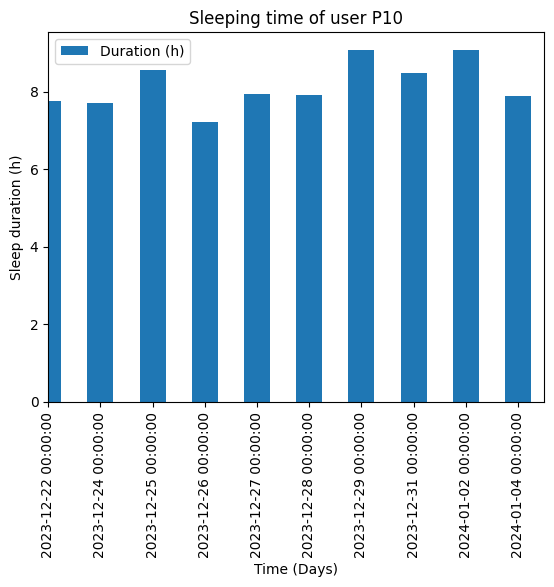

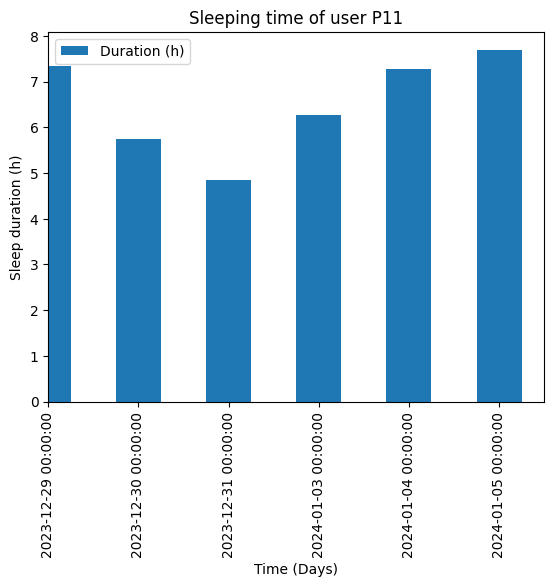

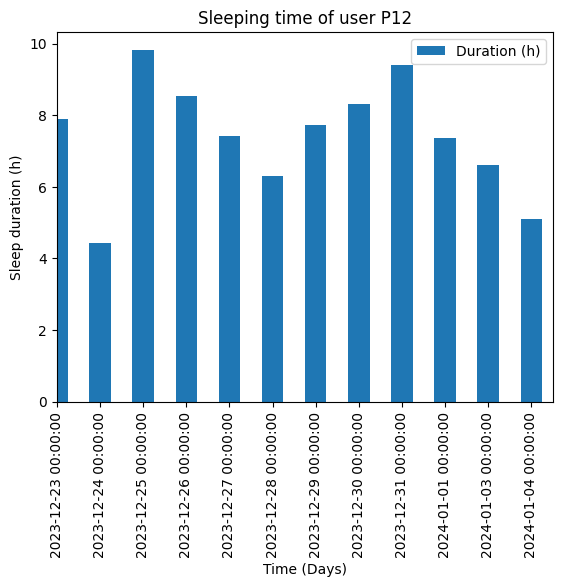

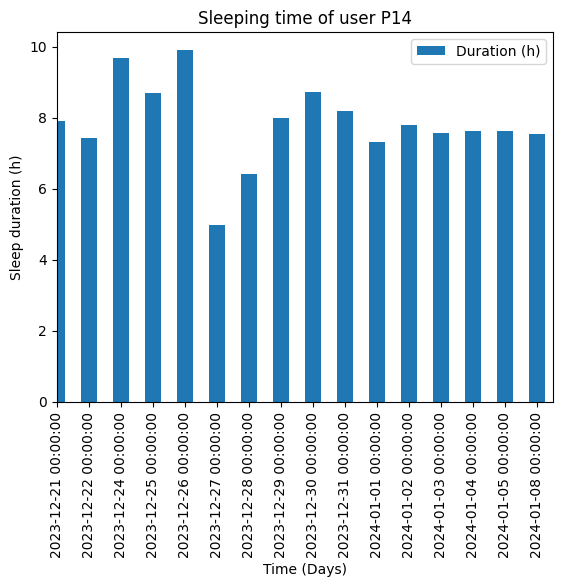

In [4]:
for user in df_users['User First Name'].unique():
    df_user_1 = df_users[df_users['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Duration (h)', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Sleep duration (h)")
    plt.xlabel("Time (Days)")
    plt.title("Sleeping time of user " + user)
    
    plt.show()

In [5]:
for user in df_users['User First Name'].unique():
    df_user_1 = df_users[df_users['User First Name'] == user]
    print("DESCRIPTION OF PARTICIPANT ------- ", user)
    print(df_user_1.describe())

DESCRIPTION OF PARTICIPANT -------  P10
      Calendar Date (Local)  Duration (s)  Rem Sleep Duration (s)  \
count                    10     10.000000                10.00000   
mean    2023-12-28 00:00:00  29376.000000              9612.00000   
min     2023-12-22 00:00:00  25980.000000              6000.00000   
25%     2023-12-25 06:00:00  28065.000000              7230.00000   
50%     2023-12-27 12:00:00  28500.000000              8520.00000   
75%     2023-12-30 12:00:00  30750.000000             10425.00000   
max     2024-01-04 00:00:00  32700.000000             19920.00000   
std                     NaN   2203.125053              3992.67329   

       Deep Sleep Duration (s)  Light Sleep Duration (s)  Sleep Efficiency  \
count                10.000000                  10.00000         10.000000   
mean               6048.000000               16746.00000          0.991583   
min                3000.000000               12060.00000          0.958963   
25%                5415.00

In [6]:
df_user_group_duration = pd.DataFrame(df_users.groupby(df_users['User First Name'])['Duration (h)'].mean())
df_user_group_duration

,Duration (h)
User First Name,
P10,8.160000
P11,6.527778
P12,7.412037
P14,7.836372


In [7]:
for category in ['Deep Sleep Duration (h)', 'Light Sleep Duration (h)', 'Rem Sleep Duration (h)']:
    df_user_group_cat_duration = pd.DataFrame(df_users.groupby(df_users['User First Name'])[category].mean())
    print(df_user_group_cat_duration)
    print("---------------------------")

                 Deep Sleep Duration (h)
User First Name                         
P10                             1.680000
P11                             1.741667
P12                             2.288889
P14                             1.402083
---------------------------
                 Light Sleep Duration (h)
User First Name                          
P10                              4.651667
P11                              3.722222
P12                              8.555556
P14                              4.957292
---------------------------
                 Rem Sleep Duration (h)
User First Name                        
P10                            2.670000
P11                            1.377778
P12                            2.420370
P14                            1.842622
---------------------------


In [8]:
df_standard_deviation = pd.DataFrame(df_users.groupby(df_users['User First Name'])['Duration (h)'].std())
df_standard_deviation

,Duration (h)
User First Name,
P10,0.611979
P11,1.100640
P12,1.602246
P14,1.165342


## Sleep Quality of Participants

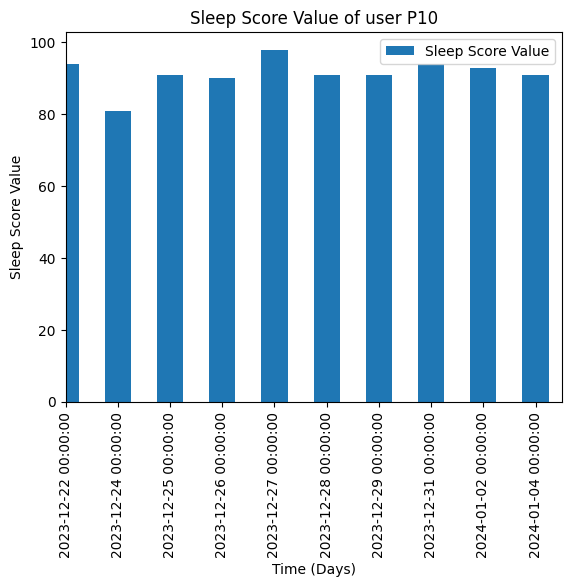

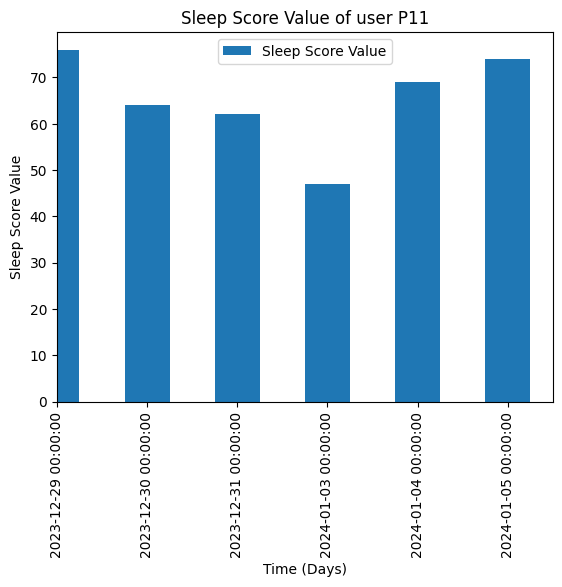

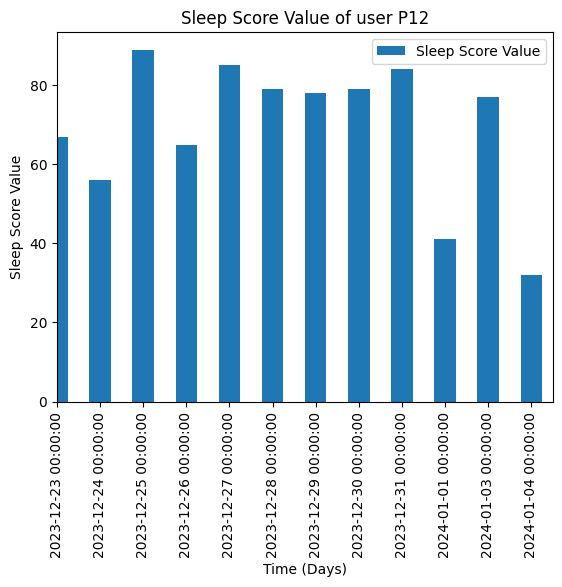

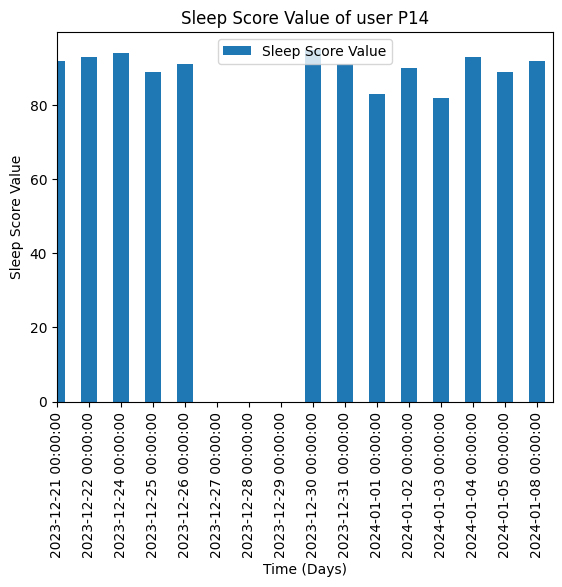

In [9]:
for user in df_users['User First Name'].unique():
    df_user_1 = df_users[df_users['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Sleep Score Value', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Sleep Score Value")
    plt.xlabel("Time (Days)")
    plt.title("Sleep Score Value of user " + user)
    
    plt.show()

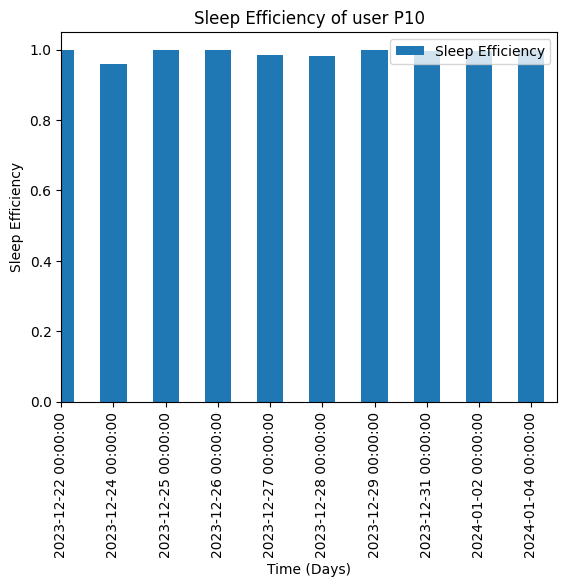

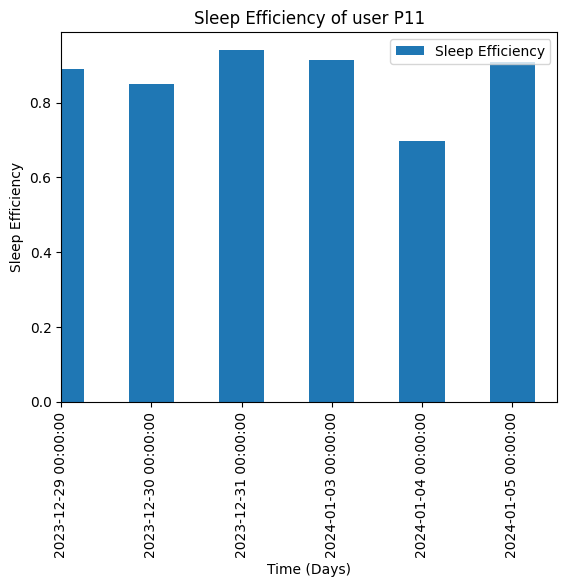

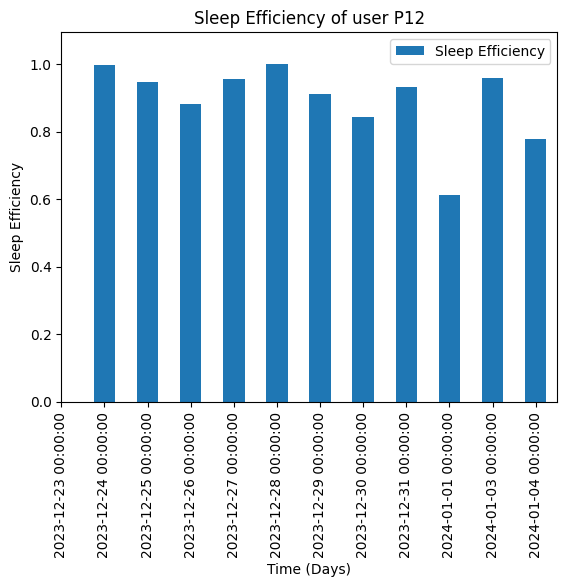

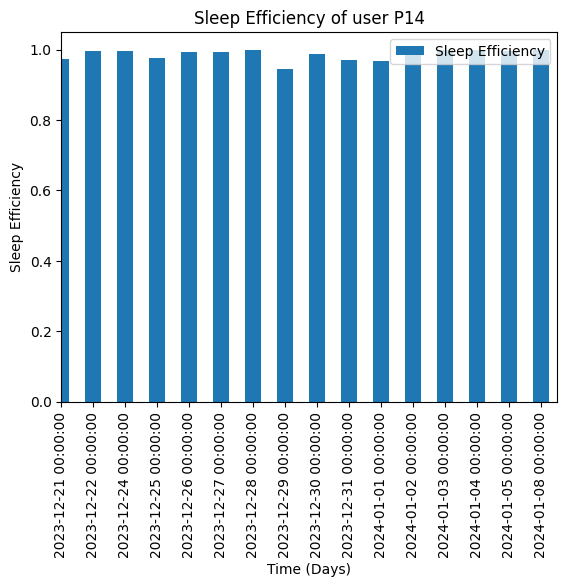

In [10]:
for user in df_users['User First Name'].unique():
    df_user_1 = df_users[df_users['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Sleep Efficiency', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Sleep Efficiency")
    plt.xlabel("Time (Days)")
    plt.title("Sleep Efficiency of user " + user)
    
    plt.show()

In [11]:
for category in ['Sleep Score Value', 'Sleep Efficiency']:
    df_user_group_cat_duration = pd.DataFrame(df_users.groupby(df_users['User First Name'])[category].mean())
    print(df_user_group_cat_duration)
    print("---------------------------")

                 Sleep Score Value
User First Name                   
P10                      91.400000
P11                      65.333333
P12                      69.333333
P14                      90.307692
---------------------------
                 Sleep Efficiency
User First Name                  
P10                      0.991583
P11                      0.867166
P12                      0.742926
P14                      0.986199
---------------------------


In [12]:
df_x = df_users.groupby('User First Name')[['Sleep Efficiency', 'Sleep Score Value', 'Duration (h)', 'Deep Sleep Duration (h)', 'Light Sleep Duration (h)', 'Rem Sleep Duration (h)']].mean()
df_x

,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
User First Name,,,,,,
P10,0.991583,91.400000,8.160000,1.680000,4.651667,2.670000
P11,0.867166,65.333333,6.527778,1.741667,3.722222,1.377778
P12,0.742926,69.333333,7.412037,2.288889,8.555556,2.420370
P14,0.986199,90.307692,7.836372,1.402083,4.957292,1.842622


In [13]:
df_x.corr()

,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
Sleep Efficiency,1.000000,0.844358,0.540695,-0.919281,-0.729499,0.015292
Sleep Score Value,0.844358,1.000000,0.899943,-0.650263,-0.251236,0.458470
Duration (h),0.540695,0.899943,1.000000,-0.254900,0.158886,0.780231
Deep Sleep Duration (h),-0.919281,-0.650263,-0.254900,1.000000,0.809607,0.356684
Light Sleep Duration (h),-0.729499,-0.251236,0.158886,0.809607,1.000000,0.517985
Rem Sleep Duration (h),0.015292,0.458470,0.780231,0.356684,0.517985,1.000000


Correlation Coefficient: 0.899943078622799


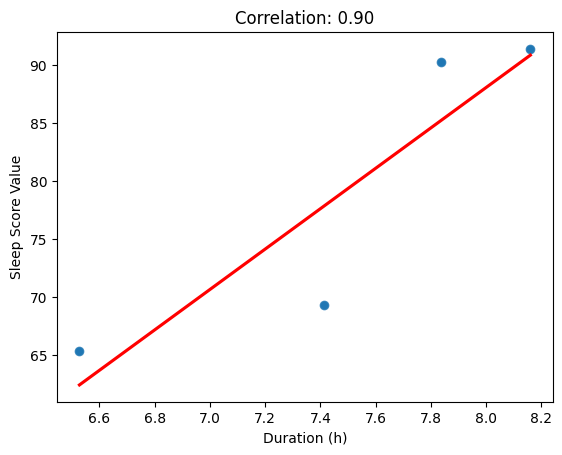

In [14]:
column1 = df_x['Duration (h)']
column2 = df_x['Sleep Score Value']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.540694535804339


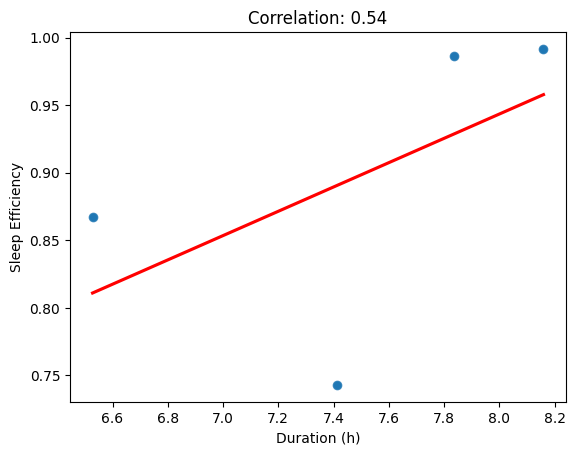

In [15]:
column1 = df_x['Duration (h)']
column2 = df_x['Sleep Efficiency']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: -0.9192807426062646


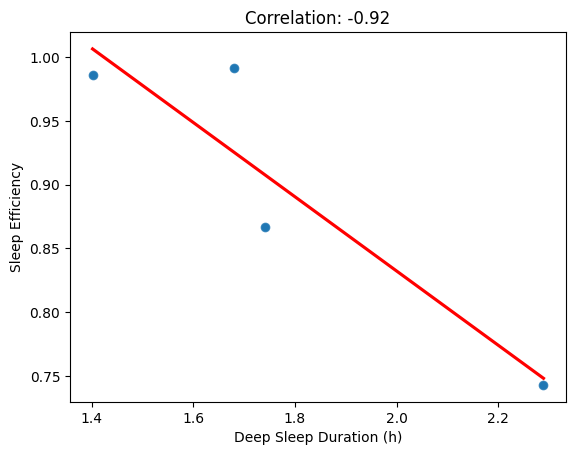

In [16]:
column1 = df_x['Deep Sleep Duration (h)']
column2 = df_x['Sleep Efficiency']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

In [17]:
df_users['Sleep Efficiency'].unique()

array([ 1.        ,  0.9589633 ,  0.9852941 ,  0.98101264,  0.9981618 ,
        0.996063  ,  0.99633026,  0.8909091 ,  0.84927535,  0.9415808 ,
        0.9148936 ,  0.6972477 ,  0.90909094, -0.9027484 ,  0.99625   ,
        0.9474576 ,  0.8828125 ,  0.9550562 ,  0.9116379 ,  0.84368736,
        0.9326241 ,  0.61085975,  0.9596977 ,  0.7777778 ,  0.9746835 ,
        0.9955157 ,  0.99482757,  0.9770115 ,  0.9932773 ,  0.9932867 ,
        0.94572026,  0.9866412 ,  0.9695122 ,  0.9681093 ,  0.98717946,
        0.99562365,  0.9977925 ])

## Trim down to single participant for further research

In [45]:
# Select user = P12 and day = 2023-12-24
#s_df = s_df[s_df['User First Name'] == 'P12']
#d_df = d_df[d_df['Calendar Date (Local)'] == '2023-12-24']

s_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
1,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
2,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
3,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
4,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device,1.000000,94.0,7.766667,0.833333,4.60,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3792,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3793,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000
3794,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device,0.997792,92.0,7.550000,1.833333,4.55,1.150000


# Dailies Dataset

In [46]:
# Load dataset
d_df = pd.read_csv('../data/garmin/dailies.csv', sep=',')

# Trim columns
#d_df = d_df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Steps', 'Stress Duration (s)']]

# Convert timestamp values
d_df['Calendar Date (Local)'] = pd.to_datetime(d_df['Calendar Date (Local)'])
d_df['Start Time (Local)'] = pd.to_datetime(d_df['Start Time (Local)'])
d_df['End Time (Local)'] = pd.to_datetime(d_df['End Time (Local)'])

# Select user = P12 and day = 2023-12-24
#d_df = d_df[d_df['User First Name'] == 'P12']
#d_df = d_df[d_df['Calendar Date (Local)'] == '2023-12-24']

print(d_df.dtypes)

d_df

User Id                                               object
User First Name                                       object
User Last Name                                       float64
User Email                                            object
Team Names                                           float64
Group Names                                           object
Calendar Date (Local)                         datetime64[ns]
Start Time (Local)                            datetime64[ns]
End Time (Local)                              datetime64[ns]
Time Zone (Local)                                      int64
Calendar Date (UTC)                                   object
Start Time (UTC)                                      object
End Time (UTC)                                        object
Start Time (s)                                         int64
Time Zone (s)                                          int64
Duration (s)                                           int64
Active Calories         

,User Id,User First Name,User Last Name,User Email,Team Names,Group Names,Calendar Date (Local),Start Time (Local),End Time (Local),Time Zone (Local),...,Rest Stress Duration (s),Activity Stress Duration (s),Low Stress Duration (s),Medium Stress Duration (s),High Stress Duration (s),Stress Qualifier,Garmin Connect Steps Goal,Garmin Connect Net Kilocalories Goal,Garmin Connect Intensity Duration Goal (s),Garmin Connect Floors Climbed Gloal
0,656ed54df07d3f126590b8f0,P10,NaN,1d7153fa@nomail.local,NaN,TUM Projektwoche,2023-12-22,2023-12-22 01:00:00,2023-12-23 00:00:00,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,656ed54df07d3f126590b8f0,P10,NaN,1d7153fa@nomail.local,NaN,TUM Projektwoche,2023-12-23,2023-12-23 01:00:00,2023-12-24 00:00:00,100,...,4620.0,NaN,26640.0,22440.0,23100.0,stressful,NaN,NaN,NaN,NaN
2,656ed54df07d3f126590b8f0,P10,NaN,1d7153fa@nomail.local,NaN,TUM Projektwoche,2023-12-24,2023-12-24 01:00:00,2023-12-25 00:00:00,100,...,0.0,NaN,0.0,0.0,0.0,calm,NaN,NaN,NaN,NaN
3,656ed54df07d3f126590b8f0,P10,NaN,1d7153fa@nomail.local,NaN,TUM Projektwoche,2023-12-25,2023-12-25 01:00:00,2023-12-26 00:00:00,100,...,2760.0,NaN,39780.0,15180.0,8940.0,balanced,NaN,NaN,NaN,NaN
4,656ed54df07d3f126590b8f0,P10,NaN,1d7153fa@nomail.local,NaN,TUM Projektwoche,2023-12-26,2023-12-26 01:00:00,2023-12-27 00:00:00,100,...,12480.0,NaN,22500.0,13200.0,4560.0,balanced,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,656ed566f07d3f126590c7ad,P14,NaN,6a9f6a6@nomail.local,NaN,TUM Projektwoche,2024-01-04,2024-01-04 01:00:00,2024-01-05 00:00:00,100,...,4620.0,NaN,2700.0,9360.0,11760.0,stressful,NaN,NaN,NaN,NaN
66,656ed566f07d3f126590c7ad,P14,NaN,6a9f6a6@nomail.local,NaN,TUM Projektwoche,2024-01-05,2024-01-05 00:00:00,2024-01-06 00:00:00,100,...,21360.0,NaN,9240.0,11340.0,8400.0,balanced,NaN,NaN,NaN,NaN
67,656ed566f07d3f126590c7ad,P14,NaN,6a9f6a6@nomail.local,NaN,TUM Projektwoche,2024-01-06,2024-01-06 00:00:00,2024-01-07 00:00:00,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,656ed566f07d3f126590c7ad,P14,NaN,6a9f6a6@nomail.local,NaN,TUM Projektwoche,2024-01-07,2024-01-07 01:00:00,2024-01-08 00:00:00,100,...,480.0,NaN,0.0,420.0,2940.0,stressful,NaN,NaN,NaN,NaN


### Steps and Distance per User

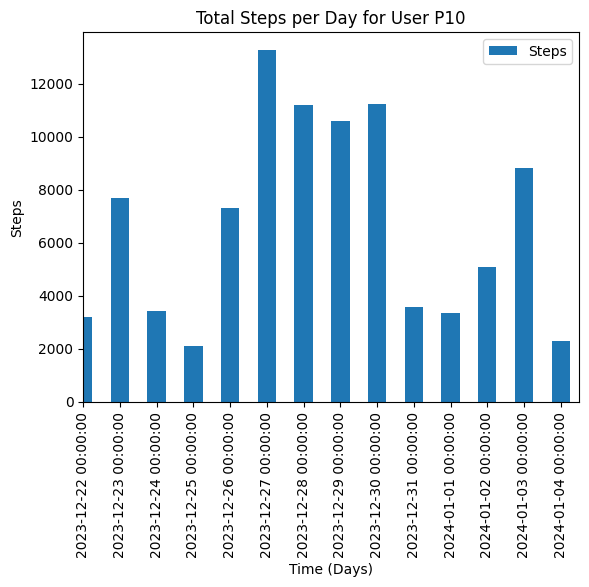

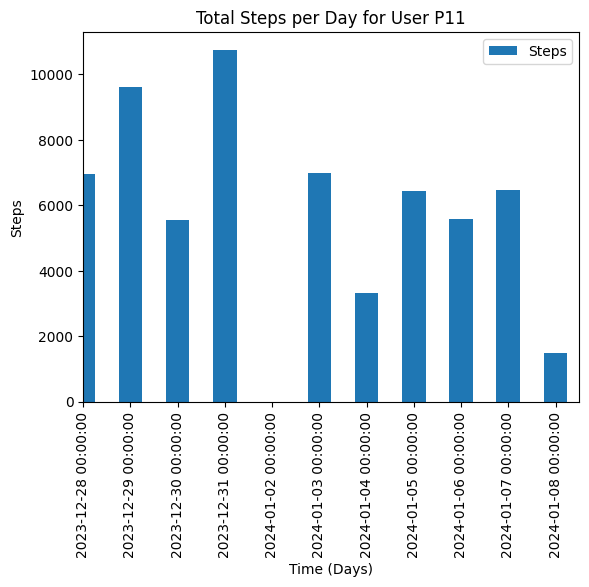

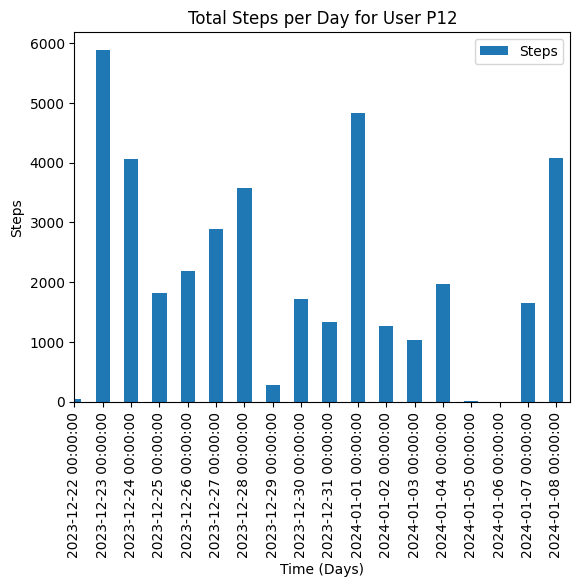

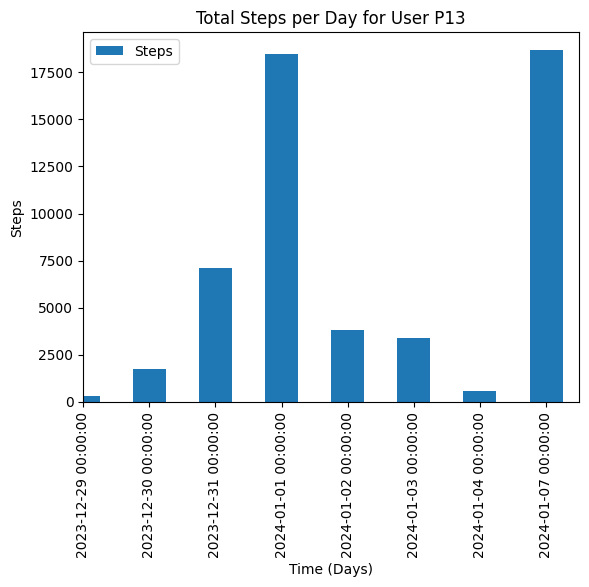

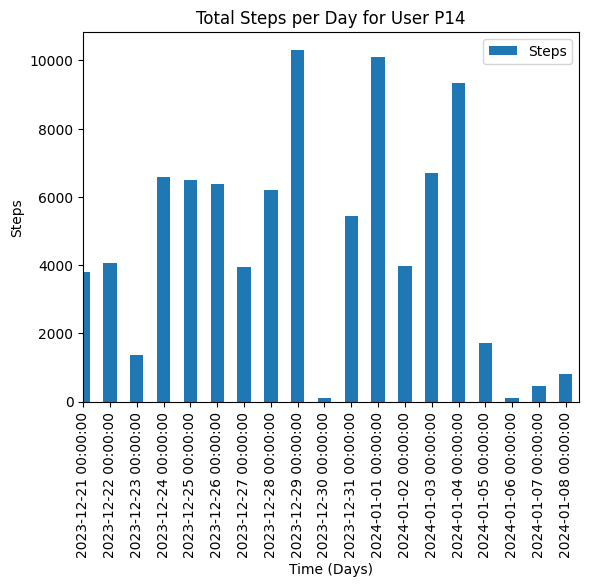

In [20]:
for user in d_df['User First Name'].unique():
    df_user_1 = d_df[d_df['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Steps', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Steps")
    plt.xlabel("Time (Days)")
    plt.title("Total Steps per Day for User " + user)
    
    plt.show()

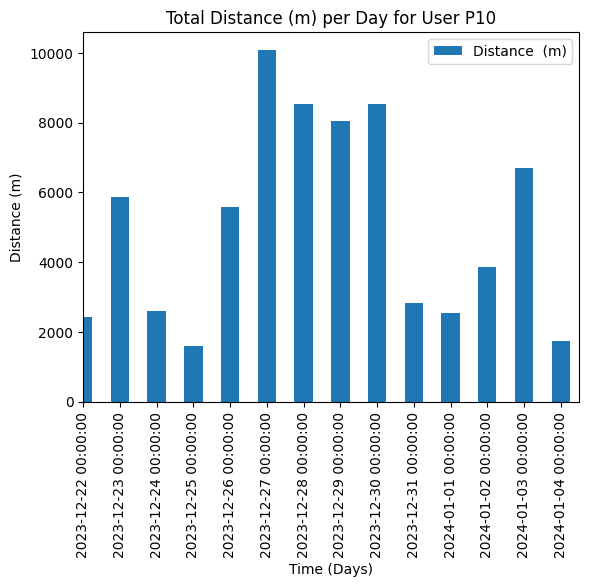

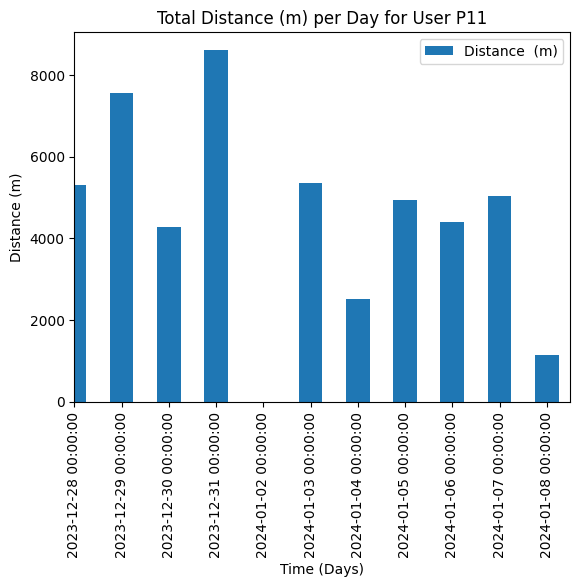

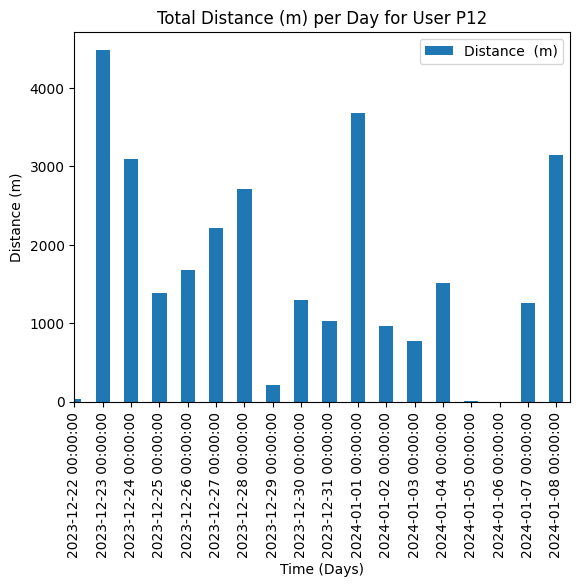

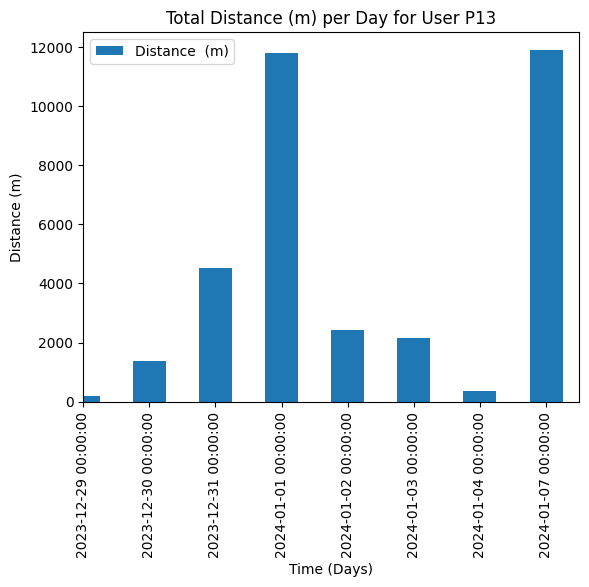

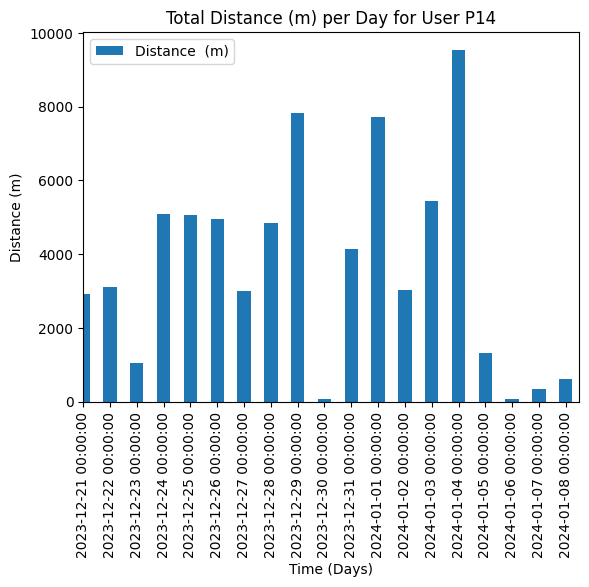

In [21]:
for user in d_df['User First Name'].unique():
    df_user_1 = d_df[d_df['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Distance  (m)', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Distance (m)")
    plt.xlabel("Time (Days)")
    plt.title("Total Distance (m) per Day for User " + user)
    
    plt.show()

In [22]:
for category in ['Steps', 'Distance  (m)']:
    df_user_group_cat_activity = pd.DataFrame(d_df.groupby(d_df['User First Name'])[category].mean())
    print(df_user_group_cat_activity)
    print("---------------------------")

                       Steps
User First Name             
P10              6647.357143
P11              5741.727273
P12              2144.444444
P13              6752.875000
P14              4621.526316
---------------------------
                 Distance  (m)
User First Name               
P10                5064.713831
P11                4467.490448
P12                1638.911112
P13                4339.873735
P14                3686.252502
---------------------------


### Stress per day per user

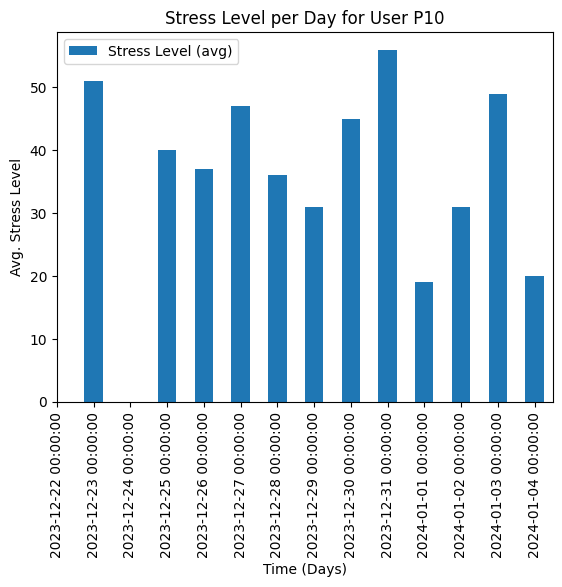

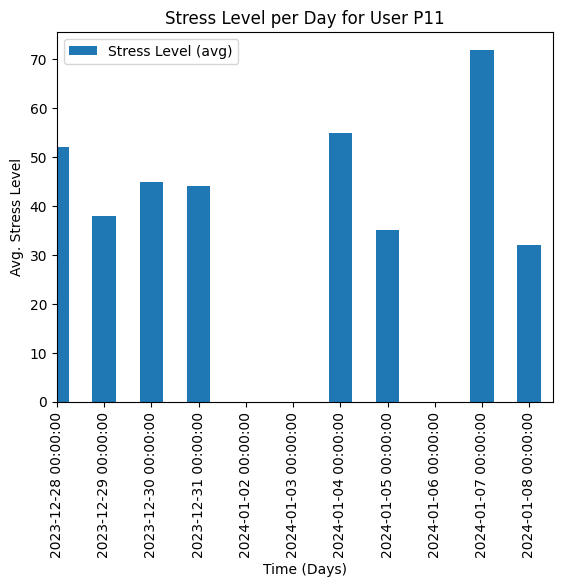

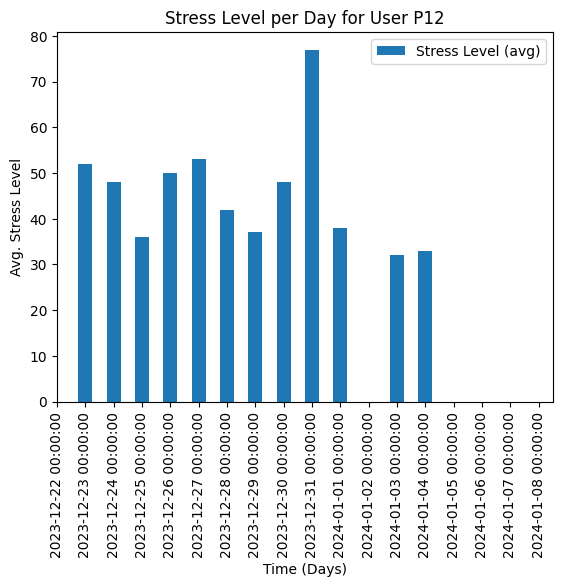

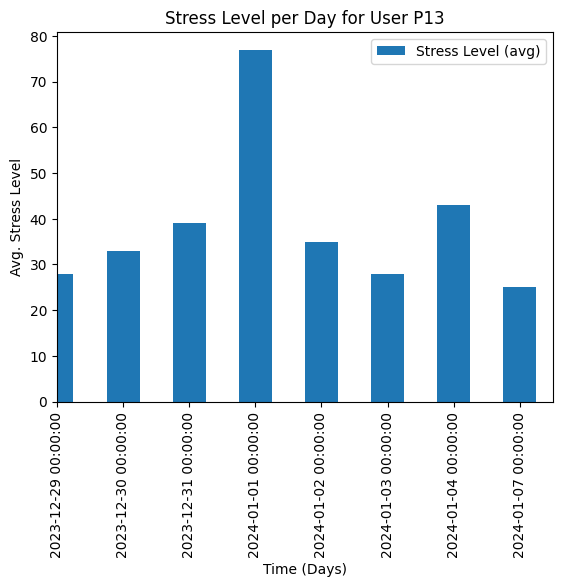

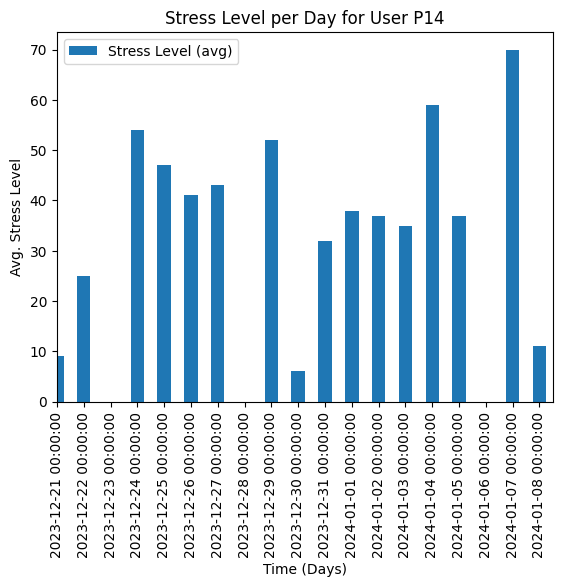

In [23]:
for user in d_df['User First Name'].unique():
    df_user_1 = d_df[d_df['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Stress Level (avg)', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Avg. Stress Level")
    plt.xlabel("Time (Days)")
    plt.title("Stress Level per Day for User " + user)
    
    plt.show()

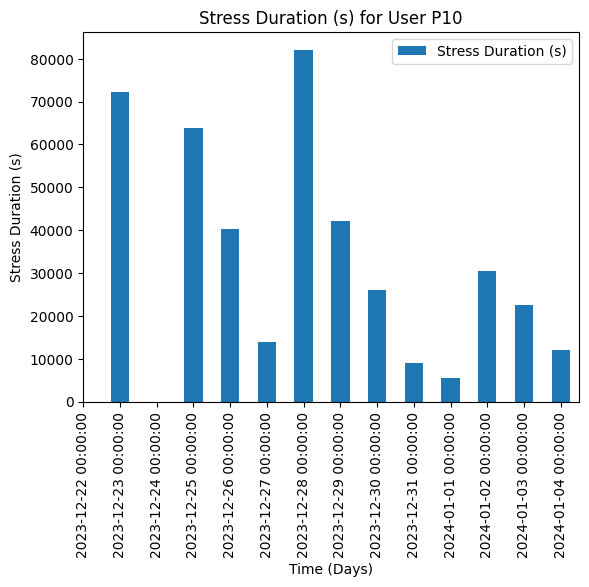

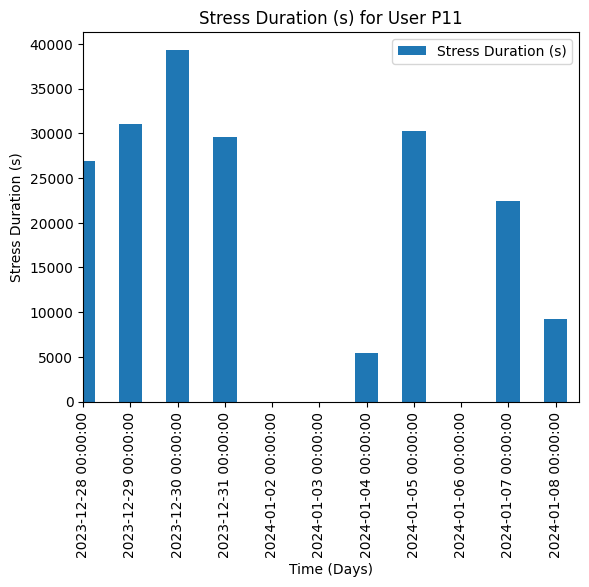

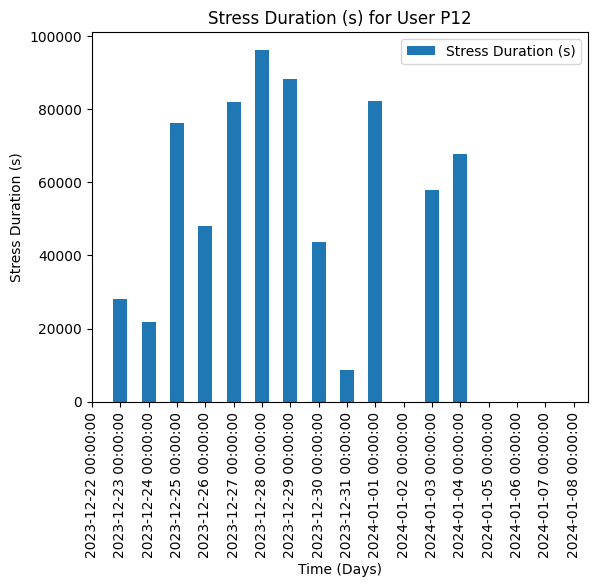

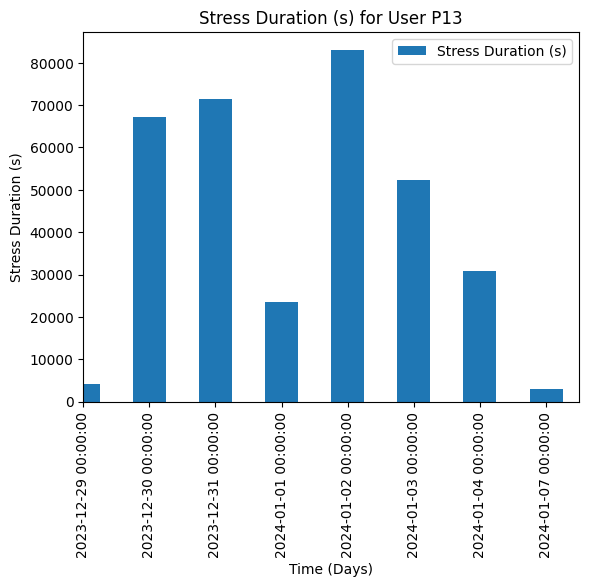

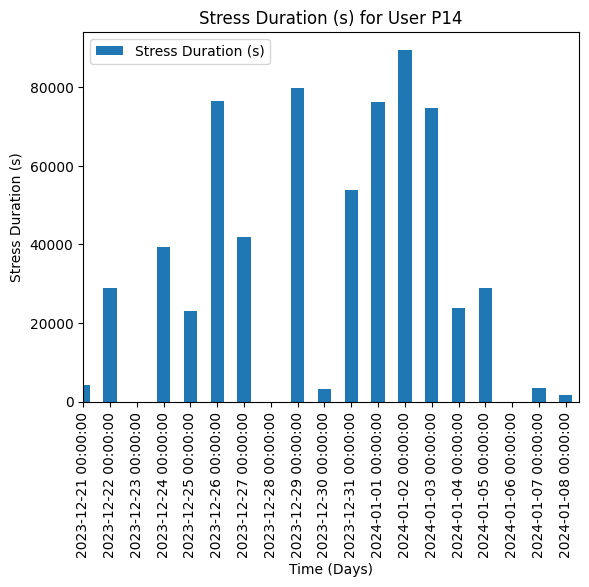

In [24]:
for user in d_df['User First Name'].unique():
    df_user_1 = d_df[d_df['User First Name'] == user]
    df_user_1.plot(x ='Calendar Date (Local)', y='Stress Duration (s)', kind='bar'),
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.ylabel("Stress Duration (s)")
    plt.xlabel("Time (Days)")
    plt.title("Stress Duration (s) for User " + user)
    
    plt.show()

In [25]:
for category in ['Stress Level (avg)', 'Stress Duration (s)']:
    df_user_group_cat_stress = pd.DataFrame(d_df.groupby(d_df['User First Name'])[category].mean())
    print(df_user_group_cat_stress)
    print("---------------------------")

                 Stress Level (avg)
User First Name                    
P10                       35.538462
P11                       46.625000
P12                       34.125000
P13                       38.500000
P14                       37.250000
---------------------------
                 Stress Duration (s)
User First Name                     
P10                     32307.692308
P11                     24262.500000
P12                     43818.750000
P13                     41940.000000
P14                     40578.750000
---------------------------


In [47]:
# Trim columns
s_df_t = s_df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Duration (h)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Rem Sleep Duration (h)', 'Deep Sleep Duration (h)', 'Light Sleep Duration (h)', 'Source', 'Sleep Efficiency', 'Sleep Score Value']]
d_df_t = d_df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Steps', 'Distance  (m)', 'Stress Duration (s)', 'Stress Level (avg)']]

# Join Sleep Dataset with Dailies Dataset
df_merged = pd.merge(s_df_t, d_df_t, on='Calendar Date (Local)', how='inner')

df_merged.drop_duplicates(ignore_index=True, inplace=True)

df_merged

,User First Name_x,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Duration (h),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Rem Sleep Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Source,Sleep Efficiency,Sleep Score Value,User First Name_y,Steps,Distance (m),Stress Duration (s),Stress Level (avg)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,7.766667,8400,3000,16560,2.333333,0.833333,4.600000,device,1.000000,94.0,P10,3183,2419.080005,NaN,NaN
1,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,7.766667,8400,3000,16560,2.333333,0.833333,4.600000,device,1.000000,94.0,P12,36,27.360001,NaN,NaN
2,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,7.766667,8400,3000,16560,2.333333,0.833333,4.600000,device,1.000000,94.0,P14,4060,3112.399995,28860.0,25.0
3,P10,2023-12-22,2023-12-22T14:00:00,2023-12-23T10:40:00,74400,20.666667,0,18840,19260,0.000000,5.233333,5.350000,server,0.604032,NaN,P10,3183,2419.080005,NaN,NaN
4,P10,2023-12-22,2023-12-22T14:00:00,2023-12-23T10:40:00,74400,20.666667,0,18840,19260,0.000000,5.233333,5.350000,server,0.604032,NaN,P12,36,27.360001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,P14,2024-01-07,2024-01-07T11:13:00,2024-01-07T14:01:00,10080,2.800000,0,9960,0,0.000000,2.766667,0.000000,server,1.000000,NaN,P14,456,346.559994,3360.0,70.0
710,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7.900000,7980,3420,16320,2.216667,0.950000,4.533333,device,0.974684,92.0,P14,3801,2905.960061,4320.0,9.0
711,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,7.550000,4140,6600,16380,1.150000,1.833333,4.550000,device,0.997792,92.0,P11,1480,1149.199994,9180.0,32.0
712,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,7.550000,4140,6600,16380,1.150000,1.833333,4.550000,device,0.997792,92.0,P12,4070,3147.600032,NaN,NaN


In [48]:
# Group glucose by day
#df_merged = pd.DataFrame(df_merged.groupby(df_merged['Calendar Date (Local)'].dt.date)['Duration (s)'].max())
df_merged.drop_duplicates(inplace=True, subset=['Calendar Date (Local)', 'User First Name_x'])

# Filter for device source
df_merged = df_merged[df_merged['Source'] == 'device']

df_merged

,User First Name_x,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Duration (h),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Rem Sleep Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Source,Sleep Efficiency,Sleep Score Value,User First Name_y,Steps,Distance (m),Stress Duration (s),Stress Level (avg)
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,7.766667,8400,3000,16560,2.333333,0.833333,4.600000,device,1.000000,94.0,P10,3183,2419.080005,NaN,NaN
9,P14,2023-12-22,2023-12-22T22:50:00,2023-12-23T06:16:00,26760,7.433333,5460,5940,15240,1.516667,1.650000,4.233333,device,0.995516,93.0,P10,3183,2419.080005,NaN,NaN
24,P12,2023-12-23,2023-12-23T00:52:00,2023-12-23T08:45:00,28380,7.883333,48240,31680,172800,13.400000,8.800000,48.000000,device,-0.902748,67.0,P10,7682,5871.920027,72180.0,51.0
45,P10,2023-12-24,2023-12-24T01:13:00,2023-12-24T08:56:00,27780,7.716667,6000,5580,15060,1.666667,1.550000,4.183333,device,0.958963,81.0,P10,3409,2590.840038,0.0,0.0
60,P12,2023-12-24,2023-12-24T00:48:00,2023-12-24T05:14:40,16000,4.444444,2200,5040,7500,0.611111,1.400000,2.083333,device,0.996250,56.0,P10,3409,2590.840038,0.0,0.0
63,P14,2023-12-24,2023-12-24T00:05:00,2023-12-24T09:45:00,34800,9.666667,10080,5760,18780,2.800000,1.600000,5.216667,device,0.994828,94.0,P10,3409,2590.840038,0.0,0.0
66,P10,2023-12-25,2023-12-25T01:07:00,2023-12-25T09:41:00,30840,8.566667,11160,6780,12900,3.100000,1.883333,3.583333,device,1.000000,91.0,P10,2099,1595.239993,63900.0,40.0
75,P12,2023-12-25,2023-12-25T00:31:00,2023-12-25T10:21:00,35400,9.833333,7200,3600,19920,2.000000,1.000000,5.533333,device,0.947458,89.0,P10,2099,1595.239993,63900.0,40.0
78,P14,2023-12-25,2023-12-25T00:10:00,2023-12-25T08:52:00,31320,8.700000,5640,4380,20580,1.566667,1.216667,5.716667,device,0.977012,89.0,P10,2099,1595.239993,63900.0,40.0
81,P10,2023-12-26,2023-12-26T01:50:00,2023-12-26T09:03:00,25980,7.216667,6960,6240,12780,1.933333,1.733333,3.550000,device,1.000000,90.0,P10,7316,5592.560089,40260.0,37.0


In [49]:
df_merged_x = df_merged.groupby('User First Name_x')[['Sleep Efficiency', 'Sleep Score Value', 'Duration (h)', 'Deep Sleep Duration (h)', 'Light Sleep Duration (h)', 'Rem Sleep Duration (h)', 'Sleep Efficiency', 'Sleep Score Value', 'Steps', 'Distance  (m)', 'Stress Duration (s)', 'Stress Level (avg)']].mean()
df_merged_x

,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h),Sleep Efficiency,Sleep Score Value,Steps,Distance (m),Stress Duration (s),Stress Level (avg)
User First Name_x,,,,,,,,,,,,
P10,0.991583,91.400000,8.160000,1.680000,4.651667,2.670000,0.991583,91.400000,6199.500000,4726.111879,32646.666667,33.111111
P11,0.867166,65.333333,6.527778,1.741667,3.722222,1.377778,0.867166,65.333333,7151.500000,5461.443997,23660.000000,39.333333
P12,0.742926,69.333333,7.412037,2.288889,8.555556,2.420370,0.742926,69.333333,7067.333333,5385.958083,32455.000000,35.916667
P14,0.986199,90.307692,7.836372,1.402083,4.957292,1.842622,0.986199,90.307692,6068.312500,4627.043402,26108.000000,32.466667


In [50]:
df_merged_x.corr()

,Sleep Efficiency,Sleep Score Value,Duration (h),Deep Sleep Duration (h),Light Sleep Duration (h),Rem Sleep Duration (h),Sleep Efficiency,Sleep Score Value,Steps,Distance (m),Stress Duration (s),Stress Level (avg)
Sleep Efficiency,1.000000,0.844358,0.540695,-0.919281,-0.729499,0.015292,1.000000,0.844358,-0.868517,-0.863591,-0.178589,-0.610629
Sleep Score Value,0.844358,1.000000,0.899943,-0.650263,-0.251236,0.458470,0.844358,1.000000,-0.990201,-0.990929,0.280178,-0.934979
Duration (h),0.540695,0.899943,1.000000,-0.254900,0.158886,0.780231,0.540695,0.899943,-0.847380,-0.852443,0.654601,-0.959862
Deep Sleep Duration (h),-0.919281,-0.650263,-0.254900,1.000000,0.809607,0.356684,-0.919281,-0.650263,0.725450,0.718405,0.532140,0.415244
Light Sleep Duration (h),-0.729499,-0.251236,0.158886,0.809607,1.000000,0.517985,-0.729499,-0.251236,0.298849,0.289124,0.640125,-0.095394
Rem Sleep Duration (h),0.015292,0.458470,0.780231,0.356684,0.517985,1.000000,0.015292,0.458470,-0.342106,-0.350271,0.980768,-0.593647
Sleep Efficiency,1.000000,0.844358,0.540695,-0.919281,-0.729499,0.015292,1.000000,0.844358,-0.868517,-0.863591,-0.178589,-0.610629
Sleep Score Value,0.844358,1.000000,0.899943,-0.650263,-0.251236,0.458470,0.844358,1.000000,-0.990201,-0.990929,0.280178,-0.934979
Steps,-0.868517,-0.990201,-0.847380,0.725450,0.298849,-0.342106,-0.868517,-0.990201,1.000000,0.999946,-0.159220,0.920720
Distance (m),-0.863591,-0.990929,-0.852443,0.718405,0.289124,-0.350271,-0.863591,-0.990929,0.999946,1.000000,-0.168105,0.924710


### What impact does Stress have on Sleep?

Correlation Coefficient: 0.6546013426219234


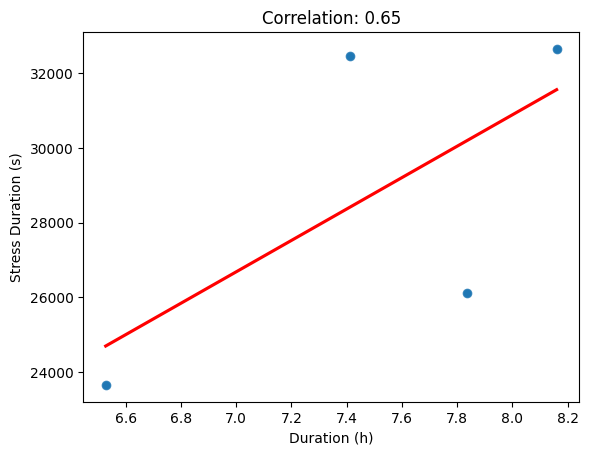

In [51]:
column1 = df_merged_x['Duration (h)']
column2 = df_merged_x['Stress Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.5321404646576718


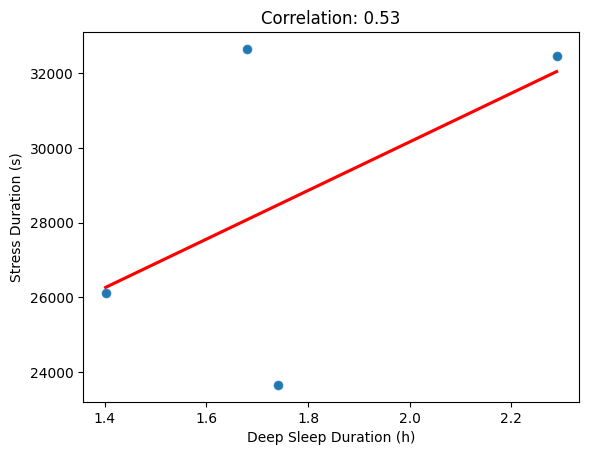

In [52]:
column1 = df_merged_x['Deep Sleep Duration (h)']
column2 = df_merged_x['Stress Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.10016916372317627


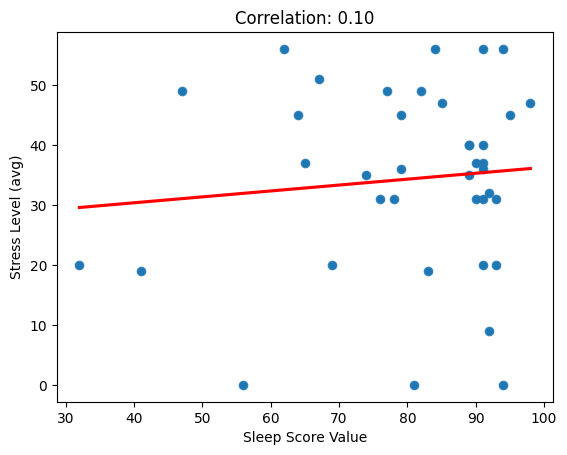

In [53]:
column1 = df_merged['Sleep Score Value']
column2 = df_merged['Stress Level (avg)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.10016916372317627


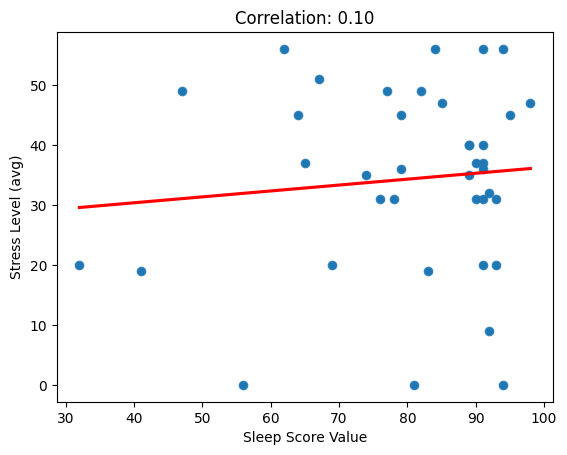

In [54]:
column1 = df_merged['Sleep Score Value']
column2 = df_merged['Stress Level (avg)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

### What impact does physical activity has on Sleep?

Correlation Coefficient: -0.8473800158235741


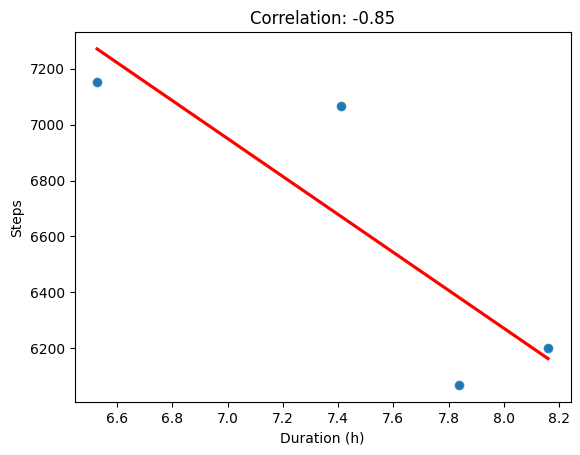

In [55]:
column1 = df_merged_x['Duration (h)']
column2 = df_merged_x['Steps']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: -0.02147612397914742


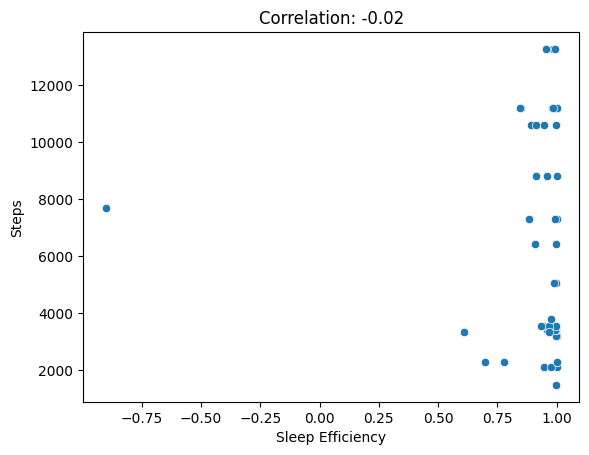

In [58]:
column1 = df_merged['Sleep Efficiency']
column2 = df_merged['Steps']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

## Trim down for one user for further research

In [36]:
# Select user = P12 and day = 2023-12-24
d_df = d_df[d_df['User First Name'] == 'P12']

Correlation Coefficient: -0.1296282298021158


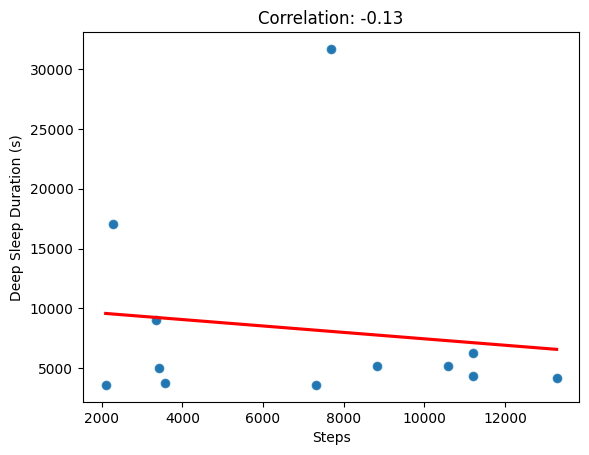

In [37]:
column1 = df_merged['Steps']
column2 = df_merged['Deep Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.3013144580319781


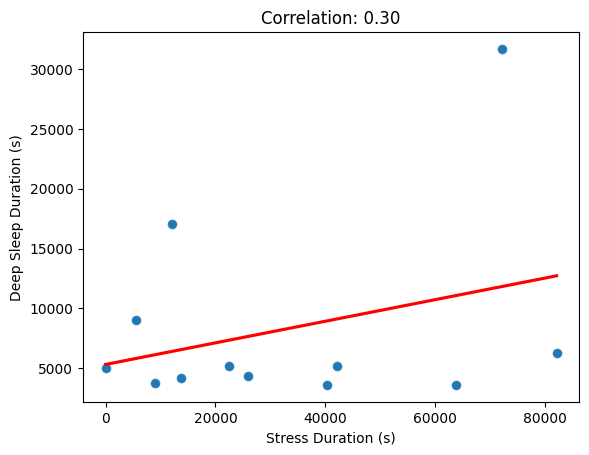

In [38]:
column1 = df_merged['Stress Duration (s)']
column2 = df_merged['Deep Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.310347381288908


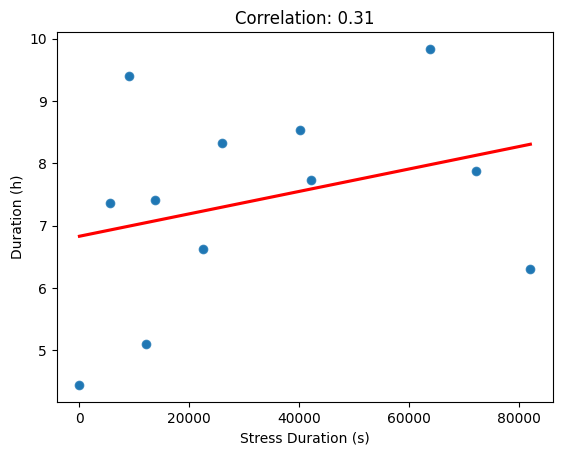

In [39]:
column1 = df_merged['Stress Duration (s)']
column2 = df_merged['Duration (h)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.6961033855616348


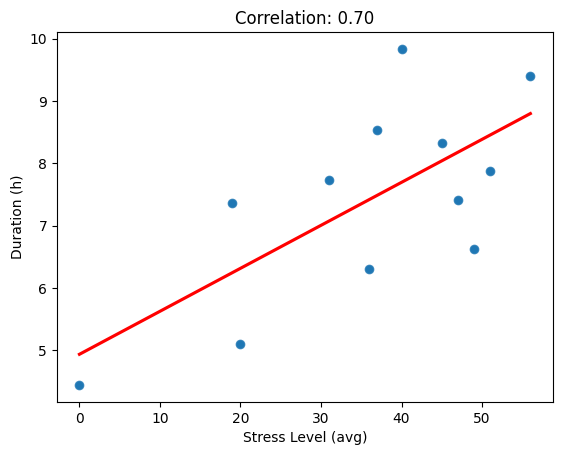

In [40]:
column1 = df_merged['Stress Level (avg)']
column2 = df_merged['Duration (h)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.06578185589198818


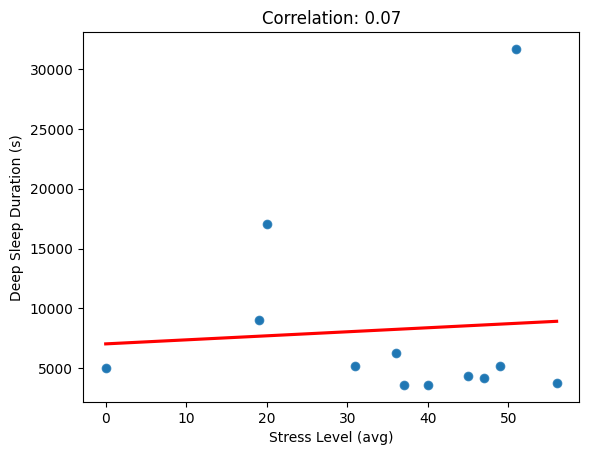

In [41]:
column1 = df_merged['Stress Level (avg)']
column2 = df_merged['Deep Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: nan


/var/folders/g1/1zlhdjc106z1jjy_cn0v6lxr0000gp/T/ipykernel_58052/1334051228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Start Time (Local)'] = pd.to_datetime(df_merged['Start Time (Local)'])
/Users/manuel/VisualStudioProjects/sleep-analytics/sleep-analytics/.venv/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/manuel/VisualStudioProjects/sleep-analytics/sleep-analytics/.venv/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/manuel/VisualStudioProjects/sleep-analytics/sleep-analytics/.venv/lib/python3.9/site-packages/numpy/

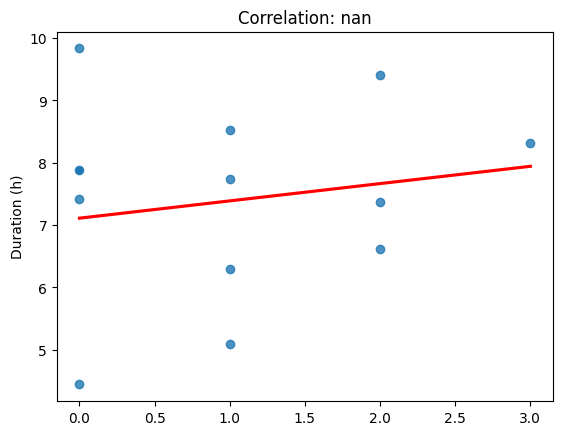

In [42]:
from datetime import datetime
df_merged['Start Time (Local)'] = pd.to_datetime(df_merged['Start Time (Local)'])
column1 = df_merged['Start Time (Local)']
column1 = pd.Series([dt.hour for dt in column1])
column2 = df_merged['Duration (h)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()